
# Worldwide COVID-19 cases


* You can download COVID-19-geographic-disbtribution dataset from here:https://github.com/DataRepo2019/Data-files/blob/master/COVID-19-geographic-disbtribution-worldwide-2020-06-29.xlsx

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**:The COVID-19-geographic-disbtribution dataset contains data about the geographic distribution of COVID-19 cases as of 29th June 2020 and capturing the number of cases and deaths for various countries across the world daily for the first six months in the year 2020
>
>The main Objective is : 
* Which are the countries with the worst mortality rates, maximum cases, and the most fatalities? 
2. What is the monthly trend vis-à-vis the number of cases and fatalities since the start of the pandemic?
3. In some of the countries, lockdowns were imposed to help flatten the curve. Did this measure aid in reducing the number of cases?

In [1]:
# Load the necessary packages
import numpy as np
import pandas as pd
#For Visualizations
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
### Data Wrangling

In [2]:
df=pd.read_excel(r'C:\Users\Nader bekir\OneDrive\Nader bekir\Projects\Worldwide COVID-19/COVID-19-geographic-disbtribution-worldwide-2020-06-29 .xlsx')
df.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp
0,2020-06-29,29,6,2020,351,18,Afghanistan,AF,AFG,38041757.0,Asia
1,2020-06-28,28,6,2020,165,20,Afghanistan,AF,AFG,38041757.0,Asia
2,2020-06-27,27,6,2020,276,8,Afghanistan,AF,AFG,38041757.0,Asia
3,2020-06-26,26,6,2020,460,36,Afghanistan,AF,AFG,38041757.0,Asia
4,2020-06-25,25,6,2020,234,21,Afghanistan,AF,AFG,38041757.0,Asia


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26562 entries, 0 to 26561
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   dateRep                  26562 non-null  datetime64[ns]
 1   day                      26562 non-null  int64         
 2   month                    26562 non-null  int64         
 3   year                     26562 non-null  int64         
 4   cases                    26562 non-null  int64         
 5   deaths                   26562 non-null  int64         
 6   countriesAndTerritories  26562 non-null  object        
 7   geoId                    26455 non-null  object        
 8   countryterritoryCode     26498 non-null  object        
 9   popData2019              26498 non-null  float64       
 10  continentExp             26562 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(5), object(4)
memory usage: 2.2+ MB


In [4]:
df.describe()

,day,month,year,cases,deaths,popData2019
count,26562.000000,26562.000000,26562.000000,26562.000000,26562.000000,2.649800e+04
mean,16.207929,4.194790,2019.997478,380.722611,18.882690,4.689196e+07
std,8.745421,1.555569,0.050161,2172.430663,121.386696,1.675462e+08
min,1.000000,1.000000,2019.000000,-2461.000000,-1918.000000,8.150000e+02
25%,9.000000,3.000000,2020.000000,0.000000,0.000000,1.919968e+06
50%,17.000000,4.000000,2020.000000,4.000000,0.000000,8.776119e+06
75%,24.000000,5.000000,2020.000000,68.000000,1.000000,3.194979e+07
max,31.000000,12.000000,2020.000000,54771.000000,4928.000000,1.433784e+09


In [5]:
#changing the column names
df.columns=['date','day','month','year','cases','deaths','country',
'old_country_code','country_code','population','continent']

In [6]:
#Dropping the redundant column name
df.drop(['old_country_code'],axis=1,inplace=True)

> We see that there is data for only one
>day in December 2019; hence we remove data for this month and
>create a new DataFrame (df1) for the remaining 11 months.

In [7]:
df1=df[df.month!=12]
df1.head()

,date,day,month,year,cases,deaths,country,country_code,population,continent
0,2020-06-29,29,6,2020,351,18,Afghanistan,AFG,38041757.0,Asia
1,2020-06-28,28,6,2020,165,20,Afghanistan,AFG,38041757.0,Asia
2,2020-06-27,27,6,2020,276,8,Afghanistan,AFG,38041757.0,Asia
3,2020-06-26,26,6,2020,460,36,Afghanistan,AFG,38041757.0,Asia
4,2020-06-25,25,6,2020,234,21,Afghanistan,AFG,38041757.0,Asia


In [8]:
df1.isna().sum().sum()/len(df1)

0.0047556142668428005

We see the percentage of null values is **less than 1%**, So we will drop the
null values in the following step.

In [9]:
df1.dropna(inplace=True)

<ipython-input-9-e0e758ddcf8a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.dropna(inplace=True)


In [10]:
#Aggregating the data by country name
df_by_country=df1.groupby('country')['cases','deaths'].sum()
df_by_country

<ipython-input-10-cbaa3f15e725>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_by_country=df1.groupby('country')['cases','deaths'].sum()


,cases,deaths
country,,
Afghanistan,30967,721
Albania,2402,55
Algeria,13273,897
Andorra,855,52
Angola,267,11
...,...,...
Vietnam,355,0
Western_Sahara,208,1
Yemen,1118,302


In [11]:
#Adding a new column for the mortality rate which is the ratio of the number of deaths to cases
df_by_country['mortality_rate']=df_by_country['deaths']/df_by_country['cases']
df_by_country

,cases,deaths,mortality_rate
country,,,
Afghanistan,30967,721,0.023283
Albania,2402,55,0.022898
Algeria,13273,897,0.067581
Andorra,855,52,0.060819
Angola,267,11,0.041199
...,...,...,...
Vietnam,355,0,0.000000
Western_Sahara,208,1,0.004808
Yemen,1118,302,0.270125


<a id='eda'></a>
## Exploratory Data Analysis


### what is the top twenty countries by mortality rate?

Text(0.5, 1.0, 'Countries with highest mortality rates')

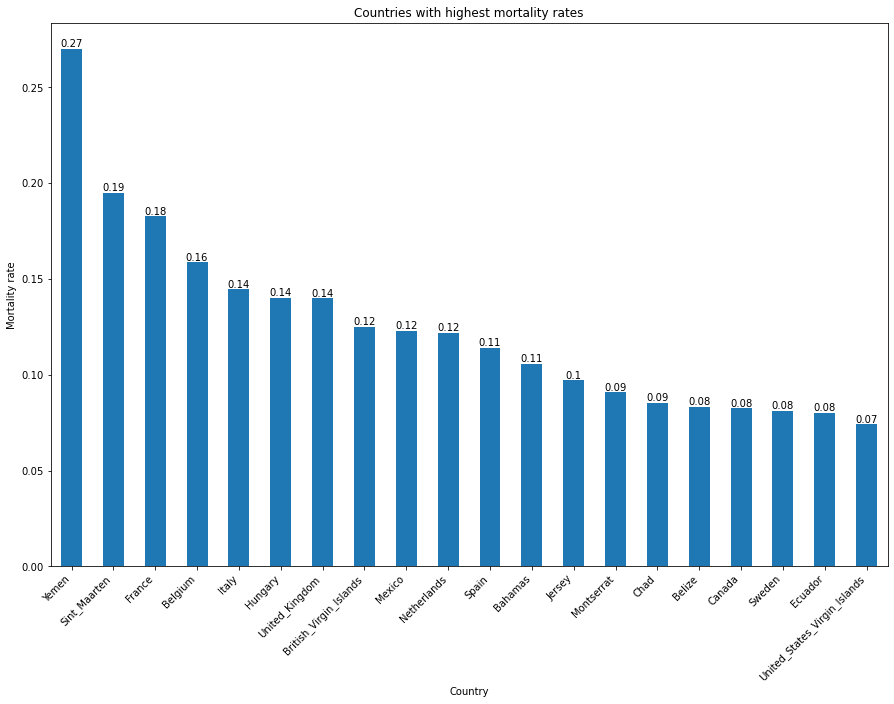

In [12]:
#Sorting the values for the mortality rate in the descending order
plt.figure(figsize=(15,10));
ax=df_by_country['mortality_rate'].sort_values(ascending=False).head(20).plot(kind='bar');
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right");
for p in ax.patches:
    ax.annotate(p.get_height().round(2),(p.get_x()+p.get_width()/2,p.get_height()),ha='center',va='bottom')
ax.set_xlabel("Country")
ax.set_ylabel("Mortality rate")
ax.set_title("Countries with highest mortality rates")

### what is the 10 countries with the highest number of  COVID-19 cases ?

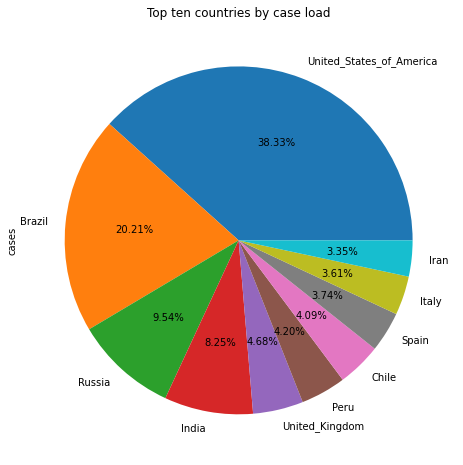

In [13]:
#Pie chart showing the countries with the highest number of COVID cases
df_cases=df_by_country['cases'].sort_values(ascending=False)
ax=df_cases.head(10).plot(kind='pie',autopct='%.2f%%',labels=df_cases.index,figsize=(12,8));
ax.set_title("Top ten countries by case load");

### what is the five countries that have suffered the most in terms of loss to human life from the COVID-19 pandemic ?

Text(0, 0.5, 'Number of deaths')

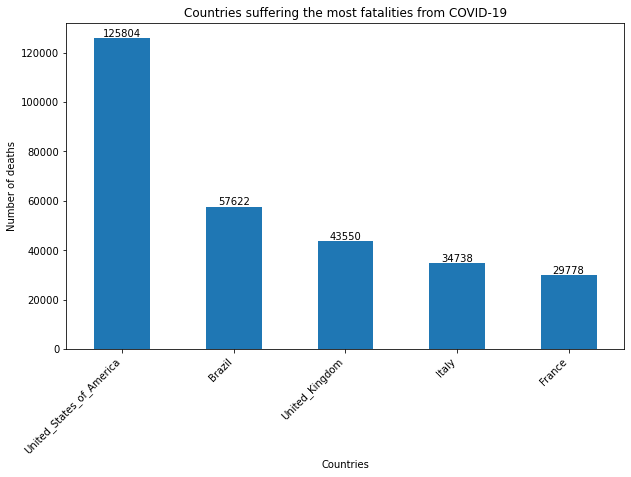

In [14]:
#sorting the number of deaths in the descending order
plt.figure(figsize=(10,6))
ax=df_by_country['deaths'].sort_values(ascending=False).head(5).plot(kind='bar')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

for p in ax.patches:
    ax.annotate(p.get_height(),(p.get_x()+p.get_width()/2,p.get_height()),ha='center',va='bottom')

ax.set_title("Countries suffering the most fatalities from COVID-19");
ax.set_xlabel("Countries")
ax.set_ylabel("Number of deaths")

###  what is number of cases and deaths by month ?

<ipython-input-15-b07d6363ecc7>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_by_month=df1.groupby('month')['cases','deaths'].sum()


Text(0, 0.5, 'Number of deaths')

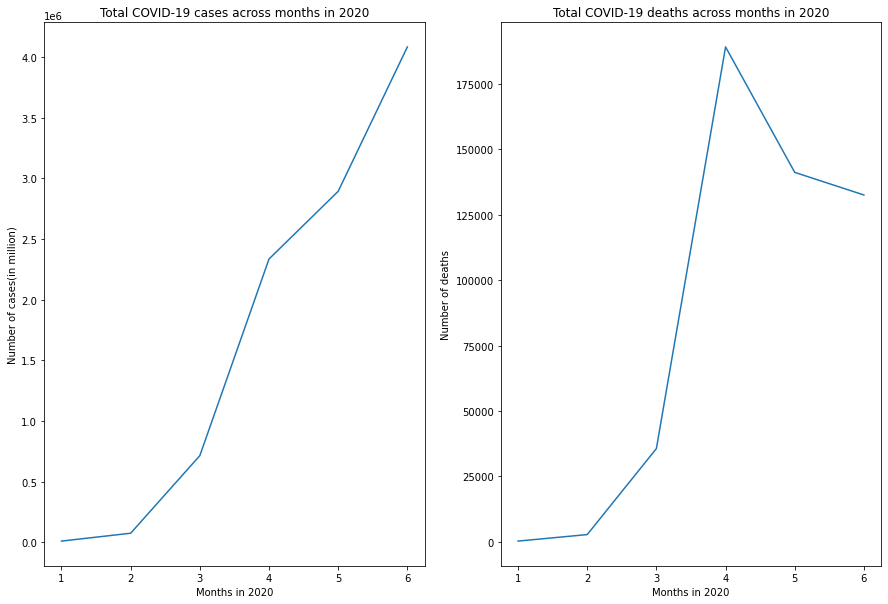

In [15]:
df_by_month=df1.groupby('month')['cases','deaths'].sum()
fig=plt.figure(figsize=(15,10))
ax1=fig.add_subplot(1,2,1)
ax2=fig.add_subplot(1,2,2)
df_by_month['cases'].plot(kind='line',ax=ax1)

ax1.set_title("Total COVID-19 cases across months in 2020")
ax1.set_xlabel("Months in 2020")
ax1.set_ylabel("Number of cases(in million)")

df_by_month['deaths'].plot(kind='line',ax=ax2)

ax2.set_title("Total COVID-19 deaths across months in 2020")
ax2.set_xlabel("Months in 2020")
ax2.set_ylabel("Number of deaths")

## 3. In some of the countries, lockdowns were imposed to help flatten the curve. Did this measure aid in reducing the number of cases?

In [16]:
#Creating DataFrames for each country
#Monthwise aggregated data for Germany
df_germany=df1[df1.country=='Germany']
df_germany_monthwise=df_germany.groupby('month')['cases','deaths'].sum()
df_germany_grouped=df_germany_monthwise.reset_index()
#Monthwise aggregated data for UK
df_uk=df1[df1.country=='United_Kingdom']
df_uk_monthwise=df_uk.groupby('month')['cases','deaths'].sum()
df_uk_grouped=df_uk_monthwise.reset_index()
#Monthwise aggregated data for India
df_india=df1[df1.country=='India']
df_india_monthwise=df_india.groupby('month')['cases','deaths'].sum()
df_india_grouped=df_india_monthwise.reset_index()
#Monthwise aggregated data for Italy
df_italy=df1[df1.country=='Italy']
df_italy_monthwise=df_italy.groupby('month')['cases','deaths'].sum()
df_italy_grouped=df_italy_monthwise.reset_index()

<ipython-input-16-4e7d74bbfcdf>:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_germany_monthwise=df_germany.groupby('month')['cases','deaths'].sum()
<ipython-input-16-4e7d74bbfcdf>:8: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_uk_monthwise=df_uk.groupby('month')['cases','deaths'].sum()
<ipython-input-16-4e7d74bbfcdf>:12: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_india_monthwise=df_india.groupby('month')['cases','deaths'].sum()
<ipython-input-16-4e7d74bbfcdf>:16: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_italy_monthwise=df_italy.groupby('month')['cases','deaths'].sum()


Text(0.5, 1.0, 'Cases in Germany across months')

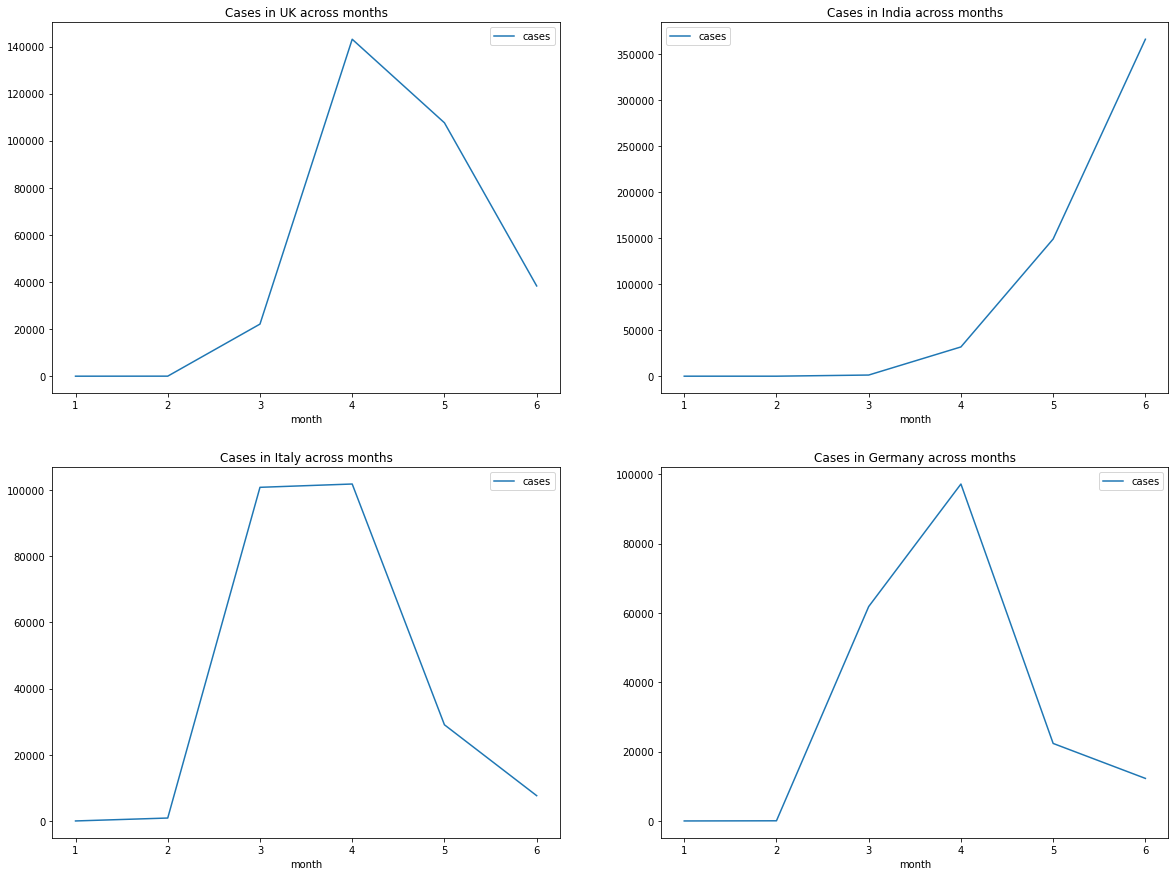

In [17]:
#Plotting the data for four countries (UK, India, Italy and Germany) where lockdowns were imposed
fig=plt.figure(figsize=(20,15))
ax1=fig.add_subplot(2,2,1)
df_uk_grouped.plot(kind='line',x='month',y='cases',ax=ax1)
ax1.set_title("Cases in UK across months")
ax2=fig.add_subplot(2,2,2)
df_india_grouped.plot(kind='line',x='month',y='cases',ax=ax2)
ax2.set_title("Cases in India across months")
ax3=fig.add_subplot(2,2,3)
df_italy_grouped.plot(kind='line',x='month',y='cases',ax=ax3)

ax3.set_title("Cases in Italy across months")
ax4=fig.add_subplot(2,2,4)
df_germany_grouped.plot(kind='line',x='month',y='cases',ax=ax4)
ax4.set_title("Cases in Germany across months")

<a id='conclusions'></a>
## Conclusions

- Number of cases: The United States, Brazil, Russia, India, and the UK
had the highest number of cases.
- Number of deaths: The United States, Brazil, the UK, Italy, and
France had the highest death tolls.
- Mortality rate: Yemen, St. Maarten, France, Belgium, and Italy had
the highest mortality rates.

**Trends**:

- The total number of cases has been increasing steadily, while
the total number of fatalities (deaths) has shown a decrease after
April.
- Impact of lockdown: We analyzed four countries – India, the UK,
Germany, and Italy – where lockdowns were imposed in March.
Except for India, all these countries experienced an overall
decrease in cases after the lockdown was imposed. In the UK and
Germany, the cases went up initially (during the early phase of
the lockdown) but started decreasing after this spike.